# Exploratory Data Analysis

## Train & Test Splits

To prevent any data leakage during exploratory data analysis, the data was first split into training and testing sets.

The split was stratified according to the `classification` variable so that both training and testing sets retain representative distributions of the target label.

All exploratory analysis was performed on the training set only.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split

# load data
df = pd.read_csv('data/processed_review_data.csv',parse_dates=['date'])

# Train-test split. 20% test. Stratify on y label
X = df.drop(columns = ['classification'])
y = df[['classification']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1, stratify = y)

# re-compile training set for eda
df = pd.concat([X_train, y_train], axis = 1).reset_index()
df.drop(columns = 'index',inplace=True)


## Class Distribution

Graphing the frequency of each review category demonstrates some imbalance between the review classifications. 

Slight class imbalance is present (60:40) but this should not pose any particular challenge for model training. However, should training results indicate poor classification performance, then resampling strategies will be investigated.  

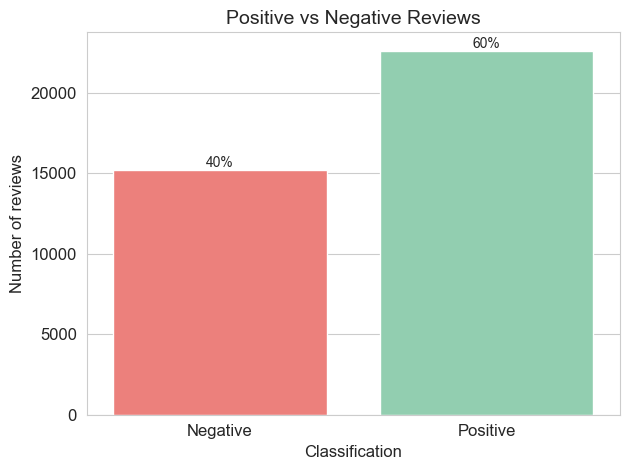

In [4]:
# data visualisation
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

# plot positive vs negative reviews
sns.set_style('whitegrid')
ax = sns.countplot(x="classification", 
              data=df, 
              palette = ['#FF6F69','#88D8B0'])

# add annotations
for c in ax.containers:
    labels = [f"{len(df[df['classification']=='Negative'])/(len(df[df['classification']=='Negative'])+len(df[df['classification']=='Positive']))*100:0.0f}%",
              f"{len(df[df['classification']=='Positive'])/(len(df[df['classification']=='Positive'])+len(df[df['classification']=='Negative']))*100:0.0f}%"]
    ax.bar_label(c, labels=labels, label_type='edge')

plt.title('Positive vs Negative Reviews',fontsize=14)
plt.xlabel('Classification',fontsize=12)
plt.ylabel('Number of reviews',fontsize=12)
plt.tick_params(labelsize=12)
plt.tight_layout()
plt.show();


## Reviews Over Time

The number of reviews has steadily declined since release. A spike in negative reviews on October 29th is notable.

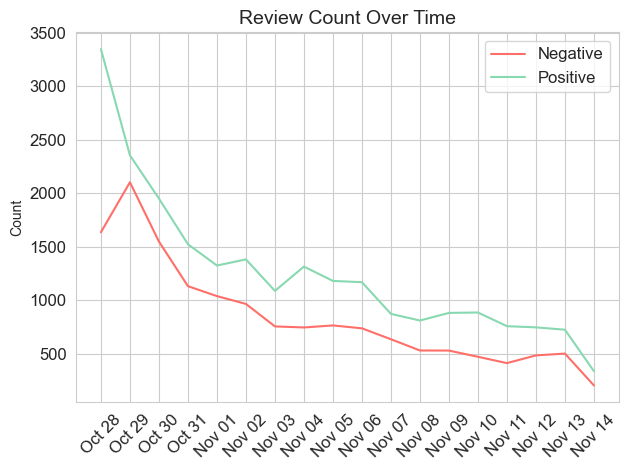

In [8]:
# plot quantity of pos and neg reviews over time
data = pd.DataFrame({'Count' : df.groupby( [ "date", "classification"] ).size()}).reset_index()
data['date'] = pd.to_datetime(data['date']).dt.strftime('%b %d')
sns.lineplot(data = data,
             x = 'date',
             y = 'Count',
             hue = 'classification',
            palette = ['#FF6F69','#88D8B0'])
plt.xticks(rotation=45)
plt.xlabel('')
plt.title('Review Count Over Time',fontsize=14)
plt.tick_params(labelsize=12)
plt.legend(title='',fontsize='12')
plt.tight_layout()
plt.show();

The average length of negative reviews tends to be longer than positive reviews but the word count also varies considerably more.

,All,Positive,Negative
mean,34.50,22.71,52.07
std,82.90,69.41,97.06
min,1.00,1.00,1.00
25%,3.00,2.00,8.00
50%,10.00,6.00,21.00
75%,31.00,17.00,56.00
max,2667.00,2667.00,1468.00


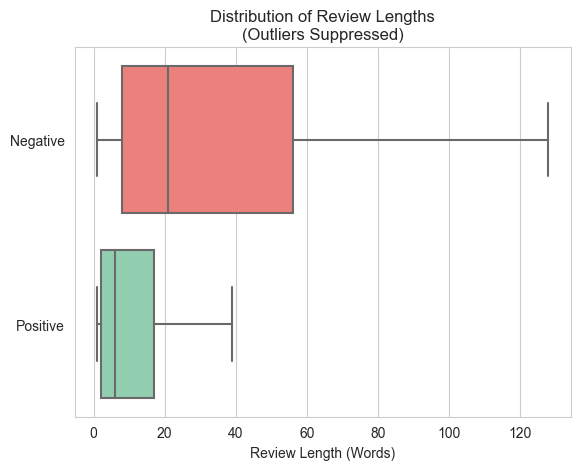

In [10]:
display(pd.DataFrame({'All': df['review_length'],
              'Positive' : df[df['classification']=='Positive']['review_length'],
              'Negative' : df[df['classification']=='Negative']['review_length']}).describe().drop(labels='count', axis=0).applymap(lambda x: f"{x:0.2f}"))

sns.boxplot(y = 'classification', 
    x = 'review_length', 
    data = df, 
    palette = ['#FF6F69','#88D8B0'],
   showfliers = False)
plt.ylabel('')
plt.xlabel('Review Length (Words)')
plt.title('Distribution of Review Lengths\n(Outliers Suppressed)');

The mean length of both positive and negative reviews has continued to vary since release.

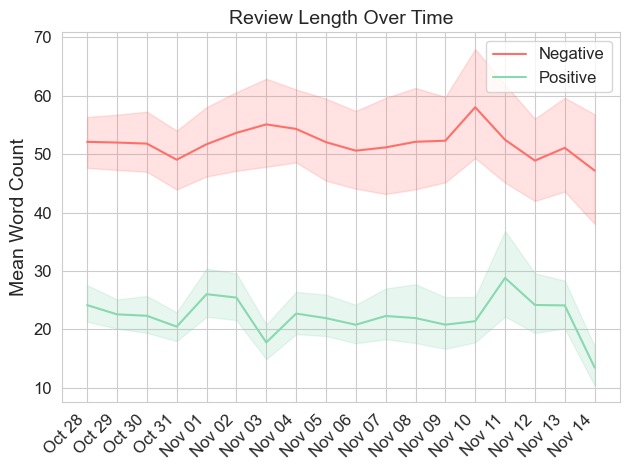

In [12]:
# plot mean review length over time
ax =sns.lineplot(x=sorted(df['date'].dt.strftime('%m %d')),
            y='review_length',
            palette = ['#FF6F69','#88D8B0'],
            hue='classification',
            data=df,
            )

plt.xlabel("")
ax.set_xticks(list(range(len(df['date'].unique()))),size=4)
ax.set_xticklabels(df['date'].sort_values().dt.strftime('%b %d').unique(), ha="right",rotation=45)
plt.ylabel("Mean Word Count",fontsize=14)
plt.legend(loc=0,fontsize='12')
plt.title("Review Length Over Time",fontsize=14)
plt.tick_params(labelsize=12)
plt.tight_layout();